# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [1]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [2]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv("apartments_clean.csv")
data.head(10)

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district,area_comfort
0,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
1,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
2,135000.0,2.0,2077.0,16.0,23.0,2012.0,65.0,25.0,18.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
3,84000.0,2.0,1273.0,6.0,26.0,2009.0,66.0,37.0,18.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
4,60000.0,1.0,1463.0,2.0,26.0,2009.0,41.0,37.0,14.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
5,900000.0,4.0,3600.0,23.0,24.0,2012.0,250.0,37.0,14.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
6,85000.0,2.0,1328.0,4.0,24.0,2009.0,64.0,30.0,20.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
7,117000.0,3.0,1401.0,14.0,26.0,2009.0,69.0,37.0,14.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
8,135000.0,1.0,1552.0,15.0,22.0,2012.0,87.0,15.0,40.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...
9,100000.0,2.0,1408.0,15.0,23.0,2007.0,71.0,30.0,12.0,Дніпровська,Оболонський,<bound method Series.clip of 0 10.0\n1 ...


## 1. Визначення типів покажчиків вхідного датасету

In [3]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = data['Price']
data = data.drop(['Price'], axis=1)

In [4]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((376,), (376, 11))

In [5]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector as select

In [6]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = select(dtype_include = np.number)
category_selector = select(dtype_include = object)

In [7]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen']
список категоріальних покажчиків = ['street', 'district', 'area_comfort']


In [8]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data[numeric_data_columns]
data_category = data[category_data_columns]

data_numeric.shape, data_category.shape

((376, 8), (376, 3))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [9]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [11]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max= min_max_scaler.fit_transform(data_numeric)

<AxesSubplot:title={'center':'data_numeric_min_max'}, ylabel='Frequency'>

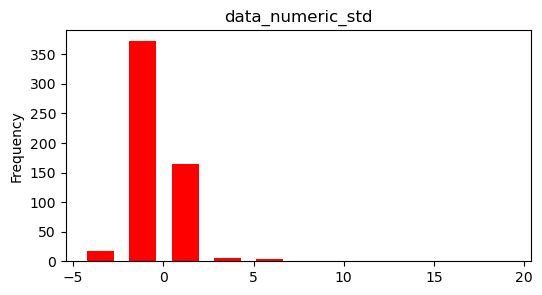

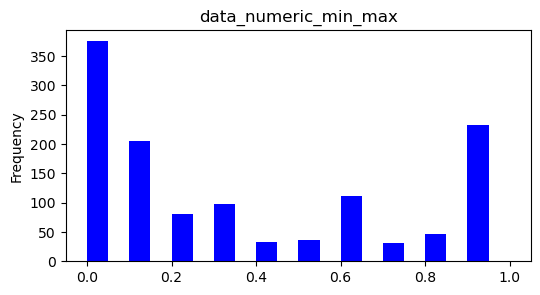

In [12]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні

#Histograph for data_numeric_std:
pd.DataFrame(data_numeric_std).plot(kind='hist', 
                                    color='red', 
                                    title='data_numeric_std', 
                                    figsize=[6,3], 
                                    width=1.5, 
                                    legend=False)
#Histograph for data_numeric_min_max:
pd.DataFrame(data_numeric_min_max).plot(kind='hist', 
                                        color='blue', 
                                        title='data_numeric_min_max', 
                                        figsize=[6,3], 
                                        width=0.05, 
                                        legend=False)

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

Відповідь:

На мою думку, у данному випадку краще підходить масштабувач MinMax, оскільки нам відоме приблизне мінімальне та максимальне значення числової підмножини робочого датасету, що дозволяя побудувати нормально розподілений графік даних, не викликаючи сильного спотворення даних.



### 2.1. Маштабування категоріальних показчиків

In [13]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати

###
#У робочому датасеті наявно лише 2 категоріальних показчика: district, street.
#Для доречного кодування категоріального показчика "район" доцільно використати OrdinalEncoder, оскільки не має суттєвої різниці
# яку "вагу" має Оболоньский чи Голосіїєвскьий район - вони рівнозначні у даному датасеті, та послідвность не грає ніякої ролі;
#В свою-ж чергу для категоріального показчика "вулиця" доречно використати OneHotEncoder
###

In [14]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = OrdinalEncoder().fit_transform(data_category[['district']])
one_hot_encoder = OneHotEncoder(sparse=False).fit_transform(data_category[['street']])

## 3. Побудова трансформера для підготовки даних

In [15]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer

In [16]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
transformer = ColumnTransformer([('ordinal_encoder', OrdinalEncoder(), ['district']),
                                 ('one_hot_encoder', OneHotEncoder(sparse=False), ['street']),
                                 ('numeric_encoder', min_max_scaler, numeric_data_columns)
                                ])
print(transformer)

ColumnTransformer(transformers=[('ordinal_encoder', OrdinalEncoder(),
                                 ['district']),
                                ('one_hot_encoder', OneHotEncoder(sparse=False),
                                 ['street']),
                                ('numeric_encoder', MinMaxScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen'])])


In [17]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = transformer.fit_transform(data)
data_transformed.shape

(376, 173)

In [19]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
data_transformed = pd.DataFrame(data_transformed)
target = pd.DataFrame(target, 
                      columns=['target'])

apartment_transformed = pd.concat([target,data_transformed], axis=1)
apartment_transformed

,target,0,1,2,3,4,5,6,7,8,...,163,164,165,166,167,168,169,170,171,172
0,NaN,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.002464,0.34375,0.323529,0.936508,0.008000,0.009677,0.026667
1,NaN,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.003583,0.53125,0.705882,0.904762,0.104000,0.087097,0.146667
2,NaN,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.008677,0.46875,0.617647,0.928571,0.106667,0.048387,0.200000
3,NaN,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.003532,0.15625,0.705882,0.904762,0.109333,0.087097,0.200000
4,NaN,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.004748,0.03125,0.705882,0.904762,0.042667,0.087097,0.146667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,NaN,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.001772,0.00000,0.088235,0.904762,0.048000,0.061290,0.146667
372,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.012113,0.03125,0.147059,0.984127,0.050667,0.012903,0.240000
373,NaN,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.002726,0.06250,0.088235,0.515873,0.024000,0.025806,0.066667
374,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.002649,0.37500,0.676471,0.865079,0.117333,0.087097,0.146667


In [20]:
# Проінспектувати вихідний датасет `apartment_transformed`
print(f'Shape is {apartment_transformed.shape}')

Shape is (376, 174)


In [21]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv')